In [223]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [224]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = iris.target

In [225]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=30)

In [226]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

4


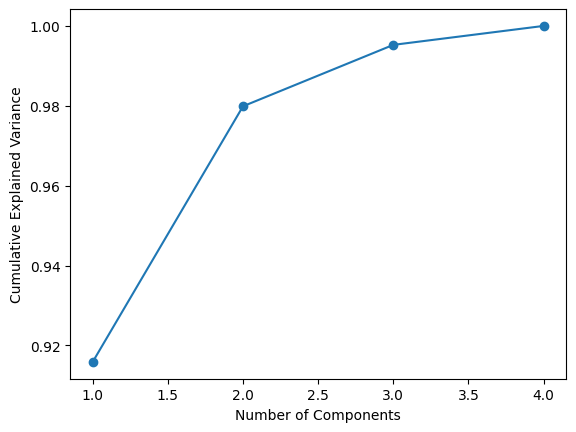

In [227]:
# PCA для определения числа компонент
pca = PCA()
pca.fit(X_train)

# Определение числа компонент, обеспечивающих наилучшие результаты классификации
explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()
optimal_components = (explained_variance_ratio_cumsum >= 0.95).sum() + 1

print(optimal_components)

# Визуализация объясненной дисперсии
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [228]:
# Преобразование данных с учетом оптимального числа компонент
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [229]:
nb_classifier.fit(X_train_pca, y_train)
nb_pred = nb_classifier.predict(X_test_pca)
nb_accuracy = accuracy_score(y_test, nb_pred)

In [230]:
lr_classifier.fit(X_train_pca, y_train)
lr_pred = lr_classifier.predict(X_test_pca)
lr_accuracy = accuracy_score(y_test, lr_pred)

In [231]:
# Линейный дискриминантный анализ (LDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [232]:
nb_classifier.fit(X_train_lda, y_train)
nb_pred_lda = nb_classifier.predict(X_test_lda)
nb_accuracy_lda = accuracy_score(y_test, nb_pred_lda)

In [233]:
lr_classifier.fit(X_train_lda, y_train)
lr_pred_lda = lr_classifier.predict(X_test_lda)
lr_accuracy_lda = accuracy_score(y_test, lr_pred_lda)

In [234]:
print(f"Байесовский классификатор (PCA): Accuracy = {nb_accuracy}")
print(f"Логистическая регрессия (PCA): Accuracy = {lr_accuracy}")
print(f"Байесовский классификатор (LDA): Accuracy = {nb_accuracy_lda}")
print(f"Логистическая регрессия (LDA): Accuracy = {lr_accuracy_lda}")

Байесовский классификатор (PCA): Accuracy = 0.9333333333333333
Логистическая регрессия (PCA): Accuracy = 0.9333333333333333
Байесовский классификатор (LDA): Accuracy = 0.9733333333333334
Логистическая регрессия (LDA): Accuracy = 0.9733333333333334
